
0: 384x640 1 folding_machine, 323.7ms
Speed: 15.5ms preprocess, 323.7ms inference, 26.3ms postprocess per image at shape (1, 3, 384, 640)


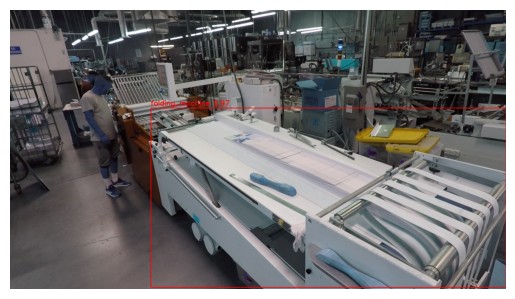

In [1]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Define the path to your trained YOLO model weights (best.pt)
#model_path = 'C:/Users/MSI/Documents/GitHub/susu_summer24/runs/detect/train10/weights/last.pt'

#model_path = '/home/tarekz/Desktop/susu_summer24/runs/detect/train16/weights/last.pt'
model_path= '../obj_det_@_tracking/runs/segment/train2/weights/last.pt'

# Load the trained YOLO model
model = YOLO(model_path)

# Function to perform inference on a single image
def infer_single_image(model, image_path):
    # Load the image using OpenCV
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Unable to read image '{image_path}'")
        return
    
    # Perform inference
    results = model(img)
    
    # Iterate through each result in the list
    for result in results[0].boxes:
        x1, y1, x2, y2 = map(int, result.xyxy[0])  # Extract the bounding box coordinates
        conf = result.conf.item()  # Convert tensor to float
        cls = result.cls.item()  # Convert tensor to int

    # Draw the bounding box
        cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Blue box with thickness 2
        cv2.putText(img, f'{model.names[int(cls)]} {conf:.2f}', (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)  # Label with confidence
    
    # Display the annotated image
        cv2.imshow('Annotated Image', img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Example usage with your specific image path
#image_path = 'C:/Users/MSI/Documents/GitHub/susu_summer24/factory_dataset/yolo_label/dataset/images/train/1ad8d484-aug_frame_0005_0.jpg'

#image_path = 'C:/Users/MSI/Documents/GitHub/susu_summer24/factory_dataset/folder/frame_0001.jpg'
image_path = '../obj_det_@_tracking/factory_dataset/frames/frames_folder\frame_0020.jpg'
infer_single_image(model, image_path)



In [31]:
import cv2
import numpy as np
import torch

# Load the model (assuming it's a custom YOLOv8 model)
model = YOLO("../obj_det_@_tracking/runs/segment/train2/weights/last.pt")  # load your custom model

# Load the image
image_path = "C:/Users/MSI/Pictures/Screenshots/Screenshot 2024-07-16 142632.png"
image = cv2.imread(image_path)

# Perform inference on the image
results = model(image)  # assuming your model directly returns results for the image

# Display results using the plot method (if provided by your model)
result_image = results[0].plot()  # Assuming results[0] contains the processed image with annotations

# Convert image to BGR format for OpenCV display
result_image_bgr = cv2.cvtColor(result_image, cv2.COLOR_RGB2BGR)

# Display the annotated image using cv2.imshow()
cv2.imshow("YOLOv8 Results", result_image_bgr)
cv2.waitKey(0)
cv2.destroyAllWindows()



0: 352x640 1 folding_machine, 1 worker, 485.2ms
Speed: 9.2ms preprocess, 485.2ms inference, 10.1ms postprocess per image at shape (1, 3, 352, 640)


# inference with overlap

In [38]:
import cv2
import numpy as np

# Load the model (assuming it's a custom YOLOv8 model)
model = YOLO("../obj_det_@_tracking/runs/segment/train2/weights/last.pt")  # load your custom model

# Load the image
image_path = "C:/Users/MSI/Pictures/Screenshots/Screenshot 2024-07-16 142632.png"
image = cv2.imread(image_path)

# Perform inference on the image
results = model(image)  # assuming your model directly returns results for the image

# Convert image to BGR format for OpenCV display
result_image = results[0].plot()  # Assuming results[0] contains the processed image with annotations
result_image_bgr = cv2.cvtColor(result_image, cv2.COLOR_RGB2BGR)

# Initialize a mask to track pixel overlap
overlap_mask = np.zeros(image.shape[:2], dtype=np.uint8)

# Function to draw bounding boxes and check for overlap
def draw_and_check_overlap(results, mask):
    overlap_detected = False
    boxes = results[0].boxes.xyxy.cpu().numpy()  # Accessing bounding boxes
    classes = results[0].boxes.cls.cpu().numpy()  # Accessing class indices
    labels = results[0].names  # Accessing labels
    
    for idx, box in enumerate(boxes):
        x1, y1, x2, y2 = map(int, box)  # Assuming the box coordinates are in the form [x1, y1, x2, y2]
        class_idx = int(classes[idx])  # Convert class index to integer
        label = labels[class_idx]  # Getting the label from the class index
        
        # Create a binary mask for the current bounding box
        box_mask = np.zeros(mask.shape, dtype=np.uint8)
        box_mask[y1:y2, x1:x2] = 1
        
        # Check for overlap
        overlap_area = np.sum(mask & box_mask)
        if overlap_area > 0:
            overlap_detected = True
        
        # Update the mask
        mask |= box_mask
        
        # Draw the bounding box
        cv2.rectangle(result_image_bgr, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(result_image_bgr, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

    return overlap_detected

# Process the results
overlap_detected = draw_and_check_overlap(results, overlap_mask)

# Add a message if overlap is detected
if overlap_detected:
    cv2.putText(result_image_bgr, "Overlap Detected", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 3)

# Display the annotated image using cv2.imshow()
cv2.imshow("YOLOv8 Results", result_image_bgr)
cv2.waitKey(0)
cv2.destroyAllWindows()



0: 352x640 1 folding_machine, 1 worker, 568.1ms
Speed: 47.6ms preprocess, 568.1ms inference, 42.2ms postprocess per image at shape (1, 3, 352, 640)
